In [1]:
# import packages and read in files

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

teams = pd.read_csv('teams.csv')
nba_stats = pd.read_csv('nba_stats.csv')

In [2]:
nba_stats.sample(3)

,Year,Season_type,PLAYER_ID,RANK,PLAYER,POS,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF
68,2015-16,Regular%20Season,101145,69,Monta Ellis,SG,1610612754,IND,81,33.8,5.4,12.6,0.427,1.1,3.5,0.309,2.0,2.5,0.786,0.5,2.8,3.3,4.7,1.9,0.5,2.5,13.8,14.0
2697,2022-23,Regular%20Season,1628368,14,De'Aaron Fox,PG,1610612758,SAC,73,33.4,9.3,18.2,0.512,1.6,5.0,0.324,4.7,6.0,0.780,0.5,3.6,4.2,6.1,1.1,0.3,2.5,25.0,24.1
1276,2018-19,Regular%20Season,1628402,174,Frank Jackson,PG,1610612740,NOP,61,19.2,3.2,7.3,0.434,0.9,2.8,0.314,0.9,1.2,0.740,0.4,1.8,2.2,1.1,0.4,0.0,0.8,8.1,6.6


In [3]:
teams.sample(3)

,Column1,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
198,4,27,55,0.329,22.0,106.2,115.1,-8.55,2022,Portland Trail Blazers
135,1,46,27,0.630,0.0,111.3,109.2,2.35,2020,Denver Nuggets
188,10,25,57,0.305,26.0,111.5,114.9,-3.26,2022,Indiana Pacers


# **Clean data**

In [4]:
#clean up season_type name

nba_stats['Season_type'].replace('Regular%20Season','Regular Season', inplace=True)

In [5]:
# change POS 'F', 'G', 'PF-C', 'SF-PF', 'C-PF'

nba_stats['POS'].replace('PF-C','PF', inplace=True)
nba_stats['POS'].replace('SF-PF','SF', inplace=True)
nba_stats['POS'].replace('C-PF','C', inplace=True)
nba_stats['POS'].replace('F','SF', inplace=True)
nba_stats['POS'].replace('G','SG', inplace=True)

In [6]:
#drop unneccessary columns

nba_stats.drop(columns=['RANK','EFF','PLAYER_ID', 'TEAM_ID'], inplace=True)

In [7]:
nba_stats.sample(3)

,Year,Season_type,PLAYER,POS,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS
1051,2017-18,Regular Season,Isaiah Taylor,PG,ATL,67,17.4,2.4,5.8,0.418,0.3,1.2,0.250,1.5,2.1,0.702,0.3,1.1,1.4,3.1,0.5,0.1,1.3,6.6
1233,2018-19,Regular Season,Danny Green,SG,TOR,80,27.7,3.7,7.9,0.465,2.5,5.4,0.455,0.5,0.6,0.841,0.8,3.2,4.0,1.6,0.9,0.7,0.9,10.3
2640,2021-22,Playoffs,Kevon Looney,SF,GSW,22,20.4,2.6,4.0,0.659,0.0,0.0,0.000,0.5,0.8,0.611,2.9,4.8,7.6,2.2,0.4,0.5,0.9,5.8


In [8]:
# drop unncessary columns

teams.drop(columns=['Column1','SRS'],inplace=True)
teams.sample(5)

,W,L,W/L%,GB,PS/G,PA/G,Year,Team
185,51,31,0.622,0.0,115.5,112.1,2022,Milwaukee Bucks
66,48,34,0.585,2.0,105.6,104.2,2018,Indiana Pacers
77,48,34,0.585,1.0,104.1,99.8,2018,Utah Jazz
191,43,39,0.524,10.0,113.9,112.4,2022,Atlanta Hawks
80,58,24,0.707,0.0,113.5,107.5,2018,Golden State Warriors


# **EDA**

In [9]:
# basic info

nba_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3073 non-null   object 
 1   Season_type  3073 non-null   object 
 2   PLAYER       3073 non-null   object 
 3   POS          3073 non-null   object 
 4   TEAM         3073 non-null   object 
 5   GP           3073 non-null   int64  
 6   MIN          3073 non-null   float64
 7   FGM          3073 non-null   float64
 8   FGA          3073 non-null   float64
 9   FG_PCT       3073 non-null   float64
 10  FG3M         3073 non-null   float64
 11  FG3A         3073 non-null   float64
 12  FG3_PCT      3073 non-null   float64
 13  FTM          3073 non-null   float64
 14  FTA          3073 non-null   float64
 15  FT_PCT       3073 non-null   float64
 16  OREB         3073 non-null   float64
 17  DREB         3073 non-null   float64
 18  REB          3073 non-null   float64
 19  AST   

In [10]:
# memory optimization

nba_stats['Season_type'] = nba_stats['Season_type'].astype('category')
nba_stats['PLAYER'] = nba_stats['PLAYER'].astype('category')
nba_stats['POS'] = nba_stats['POS'].astype('category')
nba_stats['TEAM'] = nba_stats['TEAM'].astype('category')

# Convert numeric columns to lower float type (float32)
numeric_columns = nba_stats.select_dtypes(include=['float64']).columns
nba_stats[numeric_columns] = nba_stats[numeric_columns].astype('float32')

# Print the updated data types
print(nba_stats.dtypes)


Year             object
Season_type    category
PLAYER         category
POS            category
TEAM           category
GP                int64
MIN             float32
FGM             float32
FGA             float32
FG_PCT          float32
FG3M            float32
FG3A            float32
FG3_PCT         float32
FTM             float32
FTA             float32
FT_PCT          float32
OREB            float32
DREB            float32
REB             float32
AST             float32
STL             float32
BLK             float32
TOV             float32
PTS             float32
dtype: object


In [11]:
nba_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Year         3073 non-null   object  
 1   Season_type  3073 non-null   category
 2   PLAYER       3073 non-null   category
 3   POS          3073 non-null   category
 4   TEAM         3073 non-null   category
 5   GP           3073 non-null   int64   
 6   MIN          3073 non-null   float32 
 7   FGM          3073 non-null   float32 
 8   FGA          3073 non-null   float32 
 9   FG_PCT       3073 non-null   float32 
 10  FG3M         3073 non-null   float32 
 11  FG3A         3073 non-null   float32 
 12  FG3_PCT      3073 non-null   float32 
 13  FTM          3073 non-null   float32 
 14  FTA          3073 non-null   float32 
 15  FT_PCT       3073 non-null   float32 
 16  OREB         3073 non-null   float32 
 17  DREB         3073 non-null   float32 
 18  REB          3073 non-null  

In [12]:
#describe the data

nba_stats.describe()

,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS
count,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000
mean,49.040677,25.099998,4.174292,9.086756,0.459640,1.187341,3.308428,0.313264,1.883859,2.424438,0.751438,1.037781,3.495314,4.530947,2.449203,0.773739,0.490140,1.381451,11.415555
std,29.113709,8.116267,2.324528,4.935171,0.085943,0.921053,2.373253,0.135626,1.653758,2.022882,0.164298,0.866890,1.929690,2.584489,2.014999,0.435191,0.463362,0.897044,6.586510
min,3.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,18.900000,2.500000,5.400000,0.415000,0.400000,1.500000,0.288000,0.800000,1.000000,0.703000,0.400000,2.100000,2.700000,1.000000,0.500000,0.200000,0.800000,6.600000
50%,63.000000,25.799999,3.600000,8.000000,0.450000,1.100000,3.100000,0.346000,1.400000,1.800000,0.782000,0.800000,3.100000,4.000000,1.800000,0.700000,0.400000,1.200000,9.900000
75%,73.000000,31.799999,5.500000,12.000000,0.497000,1.800000,4.800000,0.385000,2.400000,3.200000,0.844000,1.400000,4.400000,5.800000,3.300000,1.000000,0.600000,1.800000,14.900000
max,83.000000,44.000000,13.700000,30.400000,1.000000,5.800000,13.200000,1.000000,12.000000,14.800000,1.000000,5.800000,12.000000,16.299999,11.800000,2.800000,4.000000,6.200000,37.400002


In [13]:
#check for missing values

nba_stats.isna().sum()

Year           0
Season_type    0
PLAYER         0
POS            0
TEAM           0
GP             0
MIN            0
FGM            0
FGA            0
FG_PCT         0
FG3M           0
FG3A           0
FG3_PCT        0
FTM            0
FTA            0
FT_PCT         0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
PTS            0
dtype: int64

In [14]:
#check for duplicates

nba_stats.duplicated().sum()

0

In [15]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       210 non-null    int64  
 1   L       210 non-null    int64  
 2   W/L%    210 non-null    float64
 3   GB      210 non-null    float64
 4   PS/G    210 non-null    float64
 5   PA/G    210 non-null    float64
 6   Year    210 non-null    int64  
 7   Team    210 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 13.2+ KB


In [16]:
#describe the data - not too helpful with this dataframe

teams.describe()

,W,L,W/L%,GB,PS/G,PA/G,Year
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,39.471429,39.471429,0.499248,13.666667,108.595714,108.620476,2019.000000
std,11.958126,11.666073,0.146238,12.785995,5.151024,5.017129,2.004779
min,10.000000,9.000000,0.122000,0.000000,97.300000,92.900000,2016.000000
25%,31.000000,31.000000,0.393000,1.500000,104.300000,105.425000,2017.000000
50%,41.000000,39.000000,0.512000,11.000000,108.750000,108.400000,2019.000000
75%,48.000000,48.000000,0.608250,22.000000,112.775000,112.300000,2021.000000
max,73.000000,72.000000,0.890000,56.000000,120.100000,119.700000,2022.000000


In [17]:
#find null values

teams.isna().sum()

W       0
L       0
W/L%    0
GB      0
PS/G    0
PA/G    0
Year    0
Team    0
dtype: int64

In [18]:
# count the number of teams

nba_stats['TEAM'].nunique()


30

In [19]:
#count the number of players
nba_stats['PLAYER'].nunique()

689

In [20]:
#count number of positions

nba_stats['POS'].nunique()

5

In [21]:
nba_stats['POS'].unique()

['PG', 'SG', 'PF', 'C', 'SF']
Categories (5, object): ['C', 'PF', 'PG', 'SF', 'SG']

In [22]:
nba_stats['POS'].value_counts()

SG    811
SF    706
PG    536
C     516
PF    504
Name: POS, dtype: int64

# **Player Performance analysis**

In [23]:
nba_stats.columns

Index(['Year', 'Season_type', 'PLAYER', 'POS', 'TEAM', 'GP', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS'],
      dtype='object')

In [24]:
nba_stats.head()


,Year,Season_type,PLAYER,POS,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS
0,2015-16,Regular Season,Stephen Curry,PG,GSW,79,34.200001,10.2,20.200001,0.504,5.1,11.2,0.454,4.6,5.1,0.908,0.9,4.6,5.4,6.7,2.1,0.2,3.3,30.100000
1,2015-16,Regular Season,James Harden,SG,HOU,82,38.099998,8.7,19.700001,0.439,2.9,8.0,0.359,8.8,10.2,0.860,0.8,5.3,6.1,7.5,1.7,0.6,4.6,29.000000
2,2015-16,Regular Season,Kevin Durant,PF,OKC,72,35.799999,9.7,19.200001,0.505,2.6,6.7,0.387,6.2,6.9,0.898,0.6,7.6,8.2,5.0,1.0,1.2,3.5,28.200001
3,2015-16,Regular Season,DeMarcus Cousins,C,SAC,65,34.599998,9.2,20.500000,0.451,1.1,3.2,0.333,7.3,10.2,0.718,2.4,9.1,11.5,3.3,1.6,1.4,3.8,26.900000
4,2015-16,Regular Season,LeBron James,SF,CLE,76,35.599998,9.7,18.600000,0.520,1.1,3.7,0.309,4.7,6.5,0.731,1.5,6.0,7.4,6.8,1.4,0.6,3.3,25.299999


In [25]:
# group by player
# calculate average points, rebounds, and assist per game & # of games played for each player

top_25 = nba_stats.groupby('PLAYER').agg({'PTS': 'mean', 'REB': 'mean', 'AST': 'mean', 'GP': 'sum'}
                                         ).sort_values('PTS', ascending=False).head(25)

# over 8 years, a minimum of 150 games must be played
top_25_players = top_25[top_25['GP'] >= 150]

top_25_players

,PTS,REB,AST,GP
PLAYER,,,,
Luka Doncic,29.612499,8.800000,8.187500,358
Kevin Durant,28.022223,7.611111,4.988889,340
Damian Lillard,27.966667,4.391667,6.641666,535
Stephen Curry,27.950001,5.400000,6.020000,446
Giannis Antetokounmpo,27.069231,11.500000,5.376923,624
James Harden,26.949999,6.278572,8.528571,575
Bradley Beal,26.842855,4.428571,4.414286,376
Joel Embiid,26.820002,11.090000,3.100000,357
LeBron James,26.555555,8.766666,8.166667,381


# **Team Analysis**

In [26]:
teams.columns

Index(['W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'Year', 'Team'], dtype='object')

In [28]:
teams.head()

,W,L,W/L%,GB,PS/G,PA/G,Year,Team
0,56,26,0.683,0.0,102.7,98.2,2016,Toronto Raptors
1,48,34,0.585,8.0,105.7,102.5,2016,Boston Celtics
2,32,50,0.390,24.0,98.4,101.1,2016,New York Knicks
3,21,61,0.256,35.0,98.6,106.0,2016,Brooklyn Nets
4,10,72,0.122,46.0,97.4,107.6,2016,Philadelphia 76ers


In [29]:
#group by team
#calculate sum of wins and losses & average w/l %

team_record = teams.groupby('Team').agg({'W': 'sum', 'L': 'sum', 'W/L%': 'mean'}
                                         ).sort_values('W/L%', ascending=False)

team_record

,W,L,W/L%
Team,,,
Golden State Warriors,362,185,0.646857
Toronto Raptors,352,202,0.632571
Boston Celtics,340,214,0.612714
Utah Jazz,334,220,0.605143
Milwaukee Bucks,332,223,0.601571
Los Angeles Clippers,332,222,0.601571
San Antonio Spurs,322,231,0.577571
Denver Nuggets,314,241,0.568286
Miami Heat,309,246,0.557571


**Win percentage over time**

In [30]:
#top 10 teams from 2016-2023

top_10_teams = team_record.head(10).index

top_10_teams

Index(['Golden State Warriors', 'Toronto Raptors', 'Boston Celtics',
       'Utah Jazz', 'Milwaukee Bucks', 'Los Angeles Clippers',
       'San Antonio Spurs', 'Denver Nuggets', 'Miami Heat', 'Houston Rockets'],
      dtype='object', name='Team')

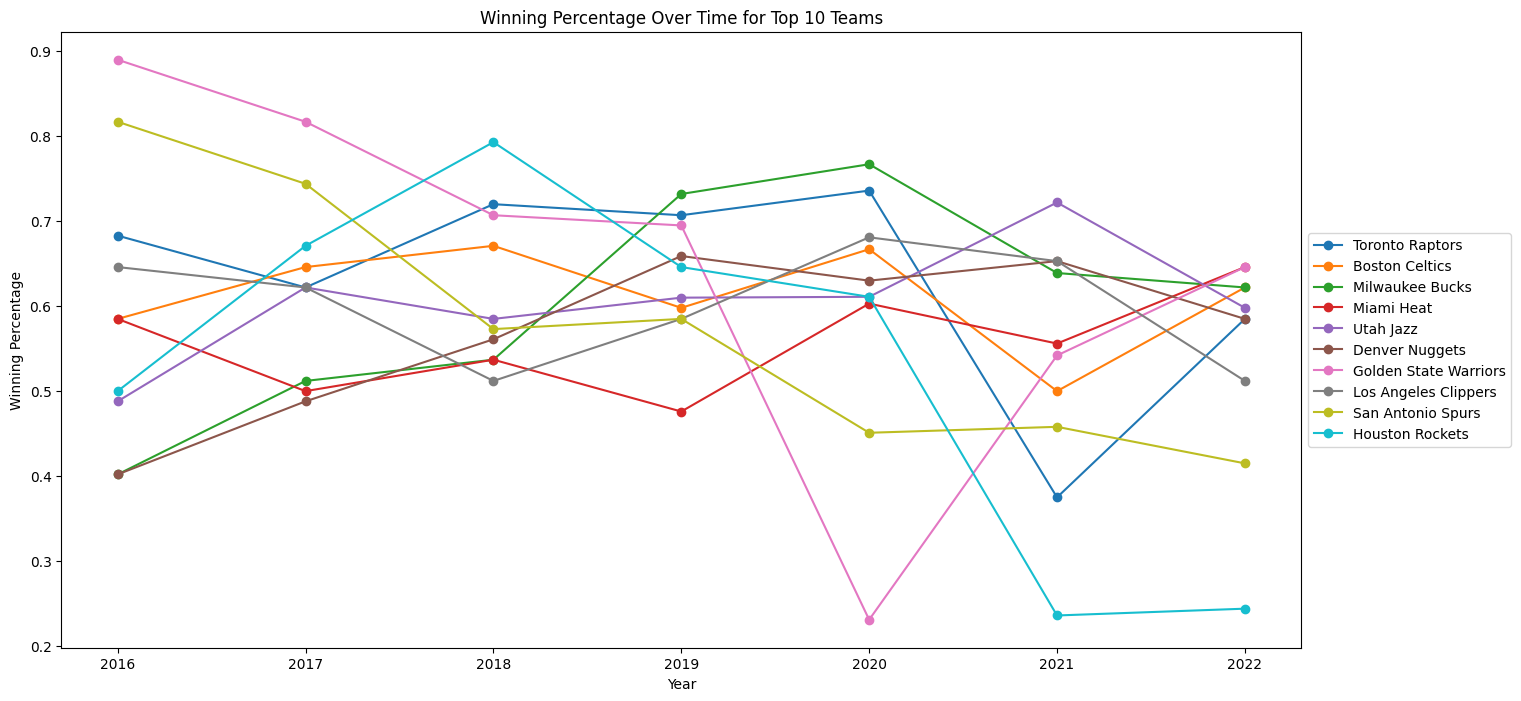

In [39]:
#filter dataframe to only include top10 teams

top_10_data = teams[teams['Team'].isin(top_10_teams)]

#plot win% over time for top 10 teams
plt.figure(figsize=(16,8))

for team in top_10_data['Team'].unique():
    team_data = top_10_data[top_10_data['Team'] == team ]
    plt.plot(team_data['Year'], team_data['W/L%'],label=team, marker='o')

plt.title('Winning Percentage Over Time for Top 10 Teams')
plt.xlabel('Year')
plt.ylabel('Winning Percentage')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [36]:
#bottom 10 teams

bottom_10_teams = team_record.tail(10).index

bottom_10_teams

Index(['Los Angeles Lakers', 'New Orleans Pelicans', 'Brooklyn Nets',
       'Phoenix Suns', 'Chicago Bulls', 'Minnesota Timberwolves',
       'Sacramento Kings', 'Detroit Pistons', 'New York Knicks',
       'Orlando Magic'],
      dtype='object', name='Team')

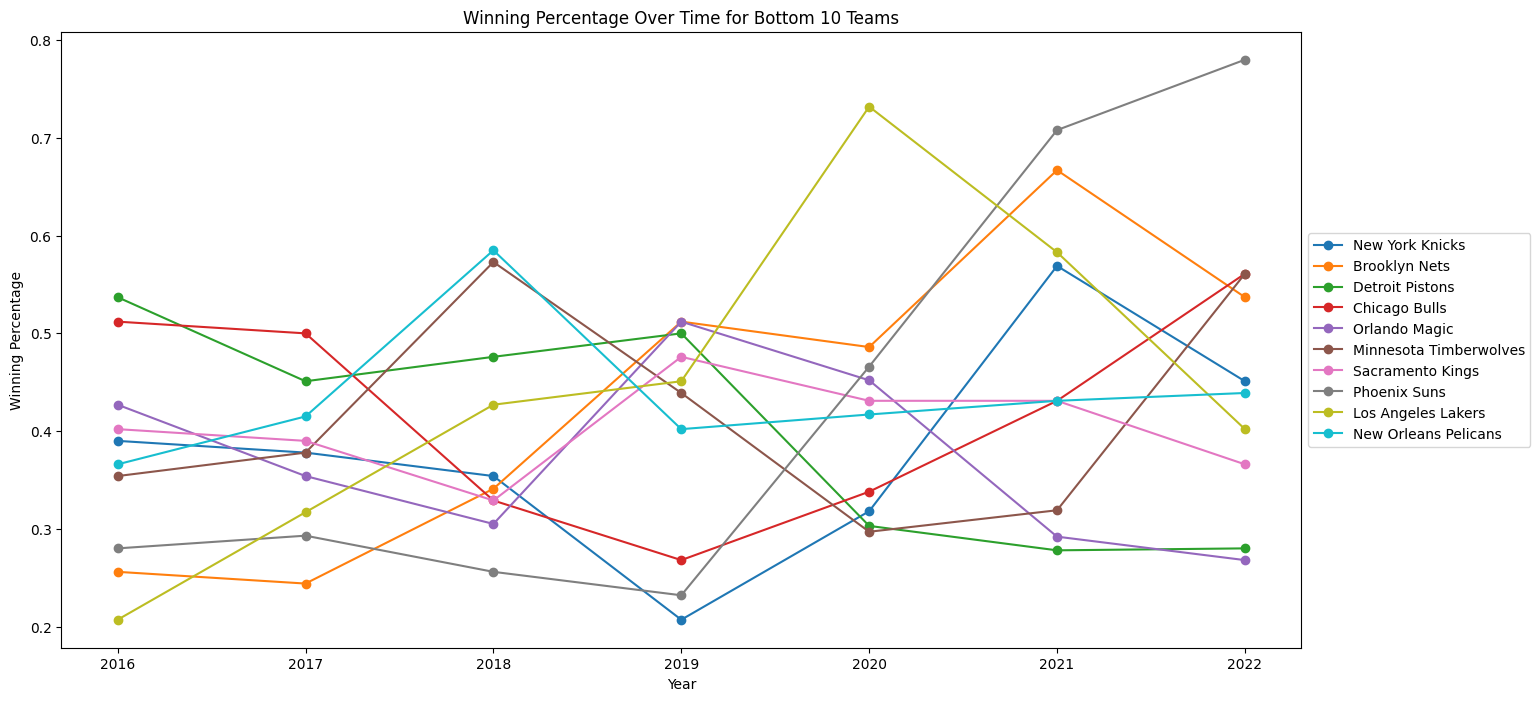

In [40]:
#bottom 10 teams

#filter dataframe to only include bottom 10 teams

bottom_10_data = teams[teams['Team'].isin(bottom_10_teams)]

#plot win% over time for top 10 teams
plt.figure(figsize=(16,8))

for team in bottom_10_data['Team'].unique():
    team_data = bottom_10_data[bottom_10_data['Team'] == team ]
    plt.plot(team_data['Year'], team_data['W/L%'],label=team, marker='o')

plt.title('Winning Percentage Over Time for Bottom 10 Teams')
plt.xlabel('Year')
plt.ylabel('Winning Percentage')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# **Positional Analysis**

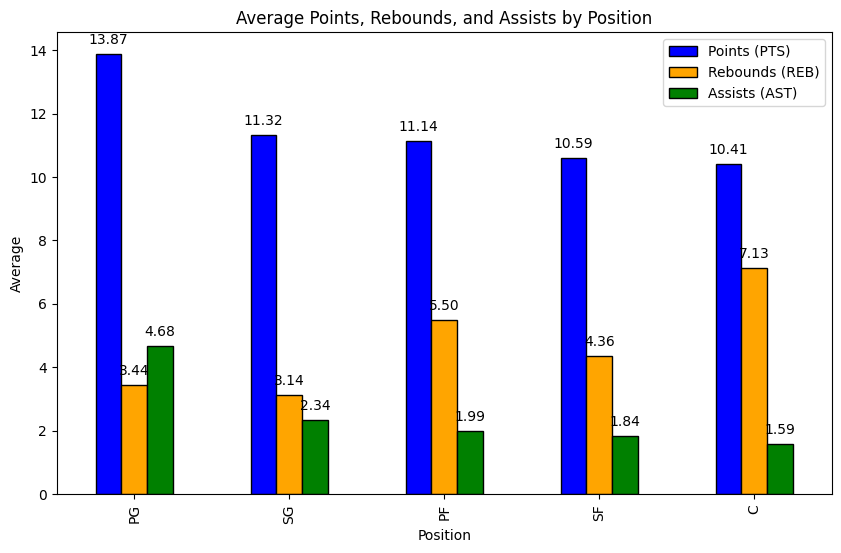

In [41]:
# Group by position and calculate average points, rebounds, and assists
position = nba_stats.groupby('POS').agg({'PTS': 'mean', 'REB': 'mean', 'AST': 'mean'}).sort_values('PTS', ascending=False)

#plotting
fig, ax = plt.subplots(figsize=(10, 6))

position.plot(kind='bar', ax=ax, color=['blue', 'orange', 'green'], edgecolor='black')

#add labels and title
ax.set_title('Average Points, Rebounds, and Assists by Position')
ax.set_xlabel('Position')
ax.set_ylabel('Average')
ax.legend(['Points (PTS)', 'Rebounds (REB)', 'Assists (AST)'])

#display values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


In [42]:
nba_stats.sample(2)

,Year,Season_type,PLAYER,POS,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS
805,2016-17,Playoffs,Raymond Felton,SG,LAC,7,18.100000,2.1,4.6,0.469,0.6,1.3,0.444,0.7,0.7,1.000,0.3,1.1,1.4,1.4,0.9,0.0,0.4,5.6
1526,2019-20,Regular Season,Zach LaVine,SG,CHI,60,34.799999,9.0,20.0,0.450,3.1,8.1,0.380,4.5,5.6,0.802,0.7,4.1,4.8,4.2,1.5,0.5,3.4,25.5


**How has the 3point game has changed from 2016 to 2023 by position?**

In [43]:
# see how the 3point game has changed from 2015 to 2023 by position

threes_stats = nba_stats[(nba_stats['Year'] >= '2015-16')& (nba_stats['Year'] <= '2022-23')][['Year', 'POS' ,'FG3M',	'FG3A', 'FG3_PCT']]

#group by year and calculate the average 'FG3M', 'FG3A', 'FG3_PCT'

threes_by_yr = threes_stats.groupby(['Year', 'POS']).mean().reset_index()

#piviot table to have diff columns for position
piviot_threes = threes_by_yr.pivot_table(index='Year', columns='POS')

piviot_threes

FG3A                                              FG3M            \
POS             C        PF        PG        SF        SG         C        PF   
Year                                                                            
2015-16  0.353571  2.836364  3.835484  2.464220  3.201739  0.110714  0.961818   
2016-17  0.759494  3.170690  4.061194  2.696154  3.547863  0.254430  1.098276   
2017-18  0.848889  3.140000  3.559375  2.783333  4.105634  0.300000  1.133333   
2018-19  1.254054  3.106250  4.261428  3.131579  4.270000  0.400000  1.065625   
2019-20  1.312698  3.682353  4.511688  3.785714  4.742157  0.438095  1.300000   
2020-21  0.900000  3.316667  4.581579  3.825882  4.532967  0.320000  1.215278   
2021-22  1.387273  3.215714  4.565432  3.573913  4.971287  0.474545  1.124286   
2022-23  1.128571  3.027778  5.023944  3.708139  4.763462  0.394643  1.045833   

                                        FG3_PCT                                \
POS            PG        SF        SG         C        PF        PG        SF   
Year                                                                            
2015-16  1.358064  0.865138  1.142609  0.121762  0.300073  0.337887  0.321202   
2016-17  1.482090  0.964423  1.281196  0.146076  0.323862  0.352194  0.330192   
2017-18  1.287500  1.015000  1.526761  0.185244  0.342667  0.343969  0.338433   
2018-19  1.525714  1.065263  1.552727  0.184378  0.335578  0.336386  0.312811   
2019-20  1.654545  1.376531  1.734314  0.224683  0.338206  0.359169  0.342235   
2020-21  1.689474  1.408235  1.690110  0.162767  0.345403  0.355092  0.329624   
2021-22  1.607407  1.275362  1.819802  0.229655  0.322000  0.341025  0.332739   
2022-23  1.800000  1.324419  1.750000  0.190000  0.329417  0.352831  0.331779   

                   
POS            SG  
Year               
2015-16  0.335722  
2016-17  0.340718  
2017-18  0.359507  
2018-19  0.350382  
2019-20  0.354353  
2020-21  0.376549  
2021-22  0.359000  
2022-23  0.359250

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

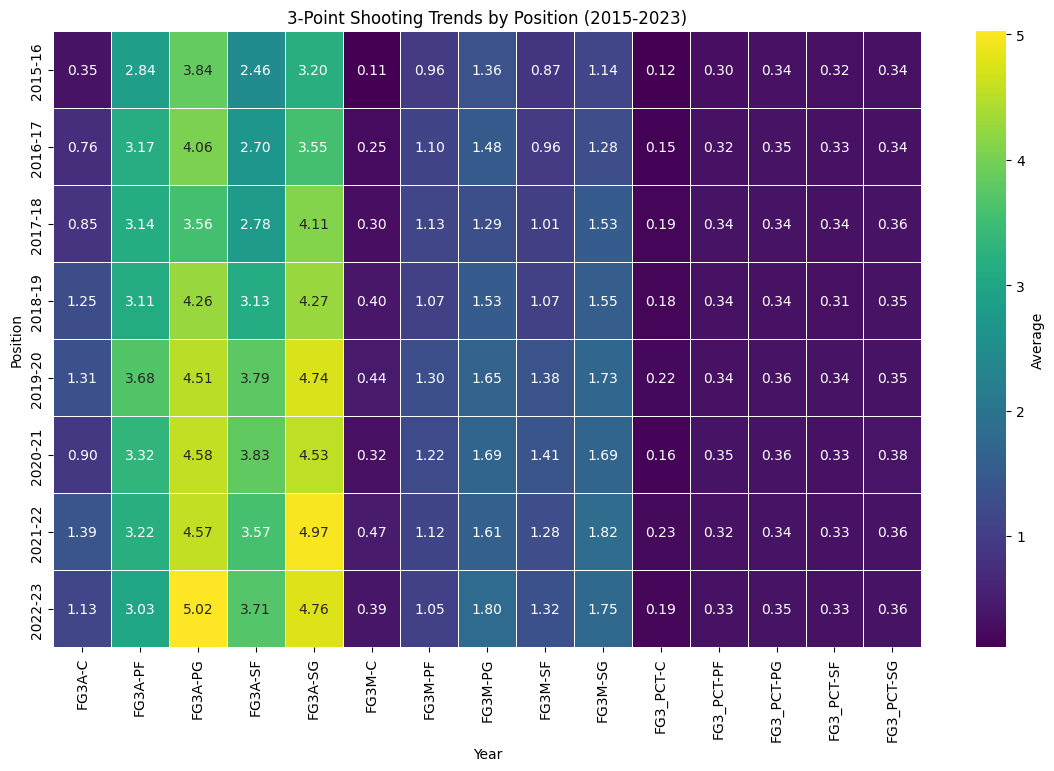

In [55]:
# plot heatmap

plt.figure(figsize=(14,8))
sns.heatmap(piviot_threes, annot=True, cmap='viridis', fmt='.2f',linewidths=.5, cbar_kws={'label': 'Average'})
plt.title('3-Point Shooting Trends by Position (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Position')
plt.show()

**Assist-to-turnover ratio**

In [46]:
#group by position and calculate sum of assists and turnovers

assist_to_stat = nba_stats.groupby('POS').agg({'AST':'sum', 'TOV':'sum'})

In [47]:
#calculate ratio

assist_to_stat['Assist_Turnover_Ratio'] = assist_to_stat['AST']/assist_to_stat['TOV']

In [48]:
#sort positions by Assist_Turnover_Ratio

assist_to_stat = assist_to_stat.sort_values('Assist_Turnover_Ratio', ascending= False)

In [49]:
assist_to_stat

,AST,TOV,Assist_Turnover_Ratio
POS,,,
PG,2510.000000,1025.800049,2.446871
SG,1897.000000,1057.599976,1.793684
SF,1297.699951,818.200012,1.586042
PF,1000.799988,661.200012,1.513612
C,820.900024,682.400024,1.202960


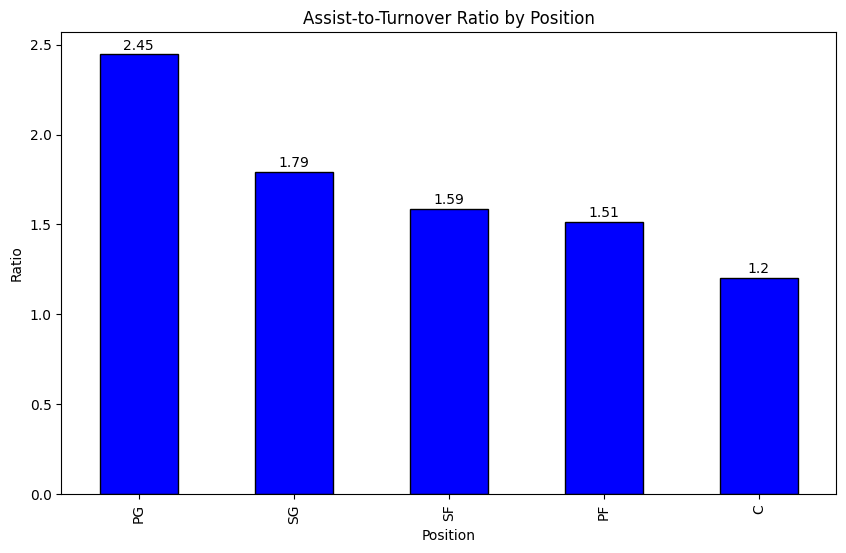

In [50]:
#plot assist to turnover ratio

fig,ax = plt.subplots(figsize=(10,6))
bars = assist_to_stat['Assist_Turnover_Ratio'].plot(kind='bar', ax=ax, color='blue', edgecolor='black')

#add labels and title
ax.set_title('Assist-to-Turnover Ratio by Position')
ax.set_xlabel('Position')
ax.set_ylabel('Ratio')

#display values on top of bars

for bar in bars.patches:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval,2), ha='center', va='bottom')